In [566]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [567]:
page=requests.get('https://www.flipkart.com/search?q=television&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off')

In [568]:
url='https://www.flipkart.com/search?q=television&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [569]:
soup=BeautifulSoup(page.text)


In [570]:
for i in soup.find_all("div",class_='KzDlHZ'):
    print(i.text)

TCL L4B 79.97 cm (32 inch) HD Ready LED Smart Android TV 2024 Edition with Metallic Bezel Less and Chr...
Infinix 80 cm (32 inch) HD Ready LED Smart Linux TV 2024 Edition
InnoQ Spectra 80 cm (32 inch) HD Ready LED TV with 30W Boom Speakers | Real Frameless | Noise Reductio...
Mi by Xiaomi A Series 80 cm (32 inch) HD Ready LED Smart Google TV 2024 Edition with 200+ Free Channel...
SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tizen TV with Bezel-Free Design | 300+ Free Channels | PurC...
Foxsky 80 cm (32 inch) HD Ready LED Smart Android TV
Coocaa 108 cm (43 inch) Full HD LED Smart Coolita TV 2024 Edition with Dolby Audio and Eye Care Techno...
TCL S5500 79.97 cm (32 inch) Full HD LED Smart Google TV 2024 Edition with 1.5 GB RAM + 16 GB ROM
InnoQ Spectra 80 cm (32 inch) HD Ready LED Smart Android TV with 30W Boom Speakers | 1000+ Smart Apps ...
Mi by Xiaomi A Series 108 cm (43 inch) Full HD LED Smart Google TV 2024 Edition with 200+ Free Channel...
InnoQ Spectra 108 cm (43 inch) Full HD LED

In [571]:
models = []

for i in soup.find_all("div", class_='KzDlHZ'):
    text = i.text.strip()

    pattern = r"^(.*?)\s*\d+\s?cm\s?\(\d+\s?inch\)\s?"
    model = re.sub(pattern, '', text).strip()  # Remove brand and size
    models.append(model)

print(models)


['HD Ready LED Smart Android TV 2024 Edition with Metallic Bezel Less and Chr...', 'HD Ready LED Smart Linux TV 2024 Edition', 'HD Ready LED TV with 30W Boom Speakers | Real Frameless | Noise Reductio...', 'HD Ready LED Smart Google TV 2024 Edition with 200+ Free Channel...', 'SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tizen TV with Bezel-Free Design | 300+ Free Channels | PurC...', 'HD Ready LED Smart Android TV', 'Full HD LED Smart Coolita TV 2024 Edition with Dolby Audio and Eye Care Techno...', 'Full HD LED Smart Google TV 2024 Edition with 1.5 GB RAM + 16 GB ROM', 'HD Ready LED Smart Android TV with 30W Boom Speakers | 1000+ Smart Apps ...', 'Full HD LED Smart Google TV 2024 Edition with 200+ Free Channel...', 'Full HD LED Smart Android TV with 30W Boom Speakers | 1000+ Smart Apps ...', 'HD Ready LED Smart FireTv OS 7 TV 2024 Edition with Dolby Audio ...', 'HD Ready LED Smart WebOS TV with Quad Core Processor, Active HDR, 60 Hz Re...', 'HD Ready LED Smart Android TV with Metallic 

In [572]:
pattern = r"^(.*?)\s\d+\s?cm\s\((\d+)\s?inch\)"
Company= []
Length = []
# Loop through products and extract details
for i in soup.find_all("div",class_='KzDlHZ'):
    match = re.search(pattern, i.text)
    if match:
        Company.append(match.group(1))  # Append title (company)
        Length.append(match.group(2))  # Append length (inch)
    else:
        Company.append(np.nan)
        Length.append(np.nan)

print("Company:", Company)
print("Length:", Length)


Company: [nan, 'Infinix', 'InnoQ Spectra', 'Mi by Xiaomi A Series', nan, 'Foxsky', 'Coocaa', nan, 'InnoQ Spectra', 'Mi by Xiaomi A Series', 'InnoQ Spectra', 'REDMI by Mi MI XIAOMI', 'LG 32LMBPTC', nan, nan, 'TCL V6B', 'realme TechLife CineSonic Q', 'Admiral', 'Infinix', nan, 'SAMSUNG', 'MarQ by Flipkart', nan, nan]
Length: [nan, '32', '32', '32', nan, '32', '43', nan, '32', '43', '43', '32', '32', nan, nan, '43', '43', '32', '32', nan, '43', '32', nan, nan]


In [573]:
Rating=[]
for i in soup.find_all("div",class_='XQDdHH'):
    Rating.append(i.text)
Rating

['4.1',
 '4.2',
 '4',
 '4.3',
 '4.3',
 '4',
 '4.2',
 '4.1',
 '4',
 '4.3',
 '4',
 '4.2',
 '4.3',
 '4.2',
 '4',
 '4.1',
 '4.3',
 '4.3',
 '4.1',
 '4',
 '4.3',
 '4.2',
 '4.3',
 '4.1',
 '4.3',
 '5',
 '1',
 '4',
 '4',
 '1',
 '4.1',
 '4',
 '4',
 '4.2',
 '5',
 '5',
 '4.2',
 '4',
 '2']

In [574]:

operating_systems = []
ultra_hd = []
four_k = []
pixels = []
resolutions = []
launch_years = []
warranties = []

# Loop through the soup object to extract details
for i in soup.find_all("div", class_='_6NESgJ'):
    # Extract Operating System
    os_match = re.search(r'Operating System: (.+?)(HD|Full HD|Ultra HD|\d+ x \d+)', i.text)
    operating_systems.append(os_match.group(1).strip() if os_match else "N/A")

    # Extract Ultra HD (Separate column for Ultra HD)
    ultra_hd_match = re.search(r'(Ultra HD)', i.text)
    ultra_hd.append("Yes" if ultra_hd_match else "No")

    # Extract 4K (Separate column for 4K)
    four_k_match = re.search(r'(4K)', i.text)
    four_k.append("Yes" if four_k_match else "No")

    # Extract Resolution (e.g., HD Ready, Full HD, Ultra HD with details like pixels)
    resolution_match = re.search(r'(HD Ready|Full HD|Ultra HD.*?\d+ x \d+ Pixels)', i.text)
    resolutions.append(resolution_match.group(1).strip() if resolution_match else "N/A")

    # Extract Pixels (if there is a specific resolution like "x x pixels")
    pixel_match = re.search(r'(\d+ x \d+ Pixels)', i.text)
    pixels.append(pixel_match.group(1).strip() if pixel_match else "N/A")

    # Extract Launch Year
    year_match = re.search(r'Launch Year: (\d+)', i.text)
    launch_years.append(year_match.group(1).strip() if year_match else "N/A")

    # Extract Warranty
    warranty_match = re.search(r'(\d+ Year.*?Warranty.*?)$', i.text)
    warranties.append(warranty_match.group(1).strip() if warranty_match else "N/A")

# Print the separate lists
print("Operating Systems:", operating_systems)
print("Ultra HD:", ultra_hd)
print("4K:", four_k)
print("Resolution:", resolutions)
print("Pixels:", pixels)
print("Launch Years:", launch_years)
print("Warranties:", warranties)


Operating Systems: ['Android', 'Linux', 'N/A', 'Google TV', 'Tizen', 'Android', 'Coolita', 'Google TV', 'Android', 'Google TV', 'Android', 'FireTv OS 7', 'WebOS', 'Android', 'Google TV', 'Google TV', 'Google TV', 'Google TV', 'Google TV', 'Google TV', 'Tizen', 'Coolita', 'Linux', 'Android']
Ultra HD: ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No']
4K: ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No']
Resolution: ['HD Ready', 'HD Ready', 'HD Ready', 'HD Ready', 'HD Ready', 'HD Ready', 'Full HD', 'Full HD', 'HD Ready', 'Full HD', 'Full HD', 'HD Ready', 'HD Ready', 'HD Ready', 'HD Ready', 'Ultra HD (4K) 3840 x 2160 Pixels', 'N/A', 'HD Ready', 'HD Ready', 'Ultra HD (4K) 3840 x 2160 Pixels', 'Full HD', 'HD Ready', 'HD Ready', 'Full HD']
Pixels: ['1366 x 768 Pixels', '1366 x 768 Pixels', '1366 x 7

In [575]:
price=[]
for i in soup.find_all("div",class_='Nx9bqj _4b5DiR'):
    price.append(i.text)
price


['₹8,990',
 '₹8,499',
 '₹6,690',
 '₹14,490',
 '₹14,990',
 '₹7,499',
 '₹12,999',
 '₹12,490',
 '₹7,590',
 '₹23,990',
 '₹12,990',
 '₹13,999',
 '₹13,990',
 '₹8,999',
 '₹10,499',
 '₹21,990',
 '₹23,499',
 '₹8,499',
 '₹9,999',
 '₹20,999',
 '₹24,990',
 '₹8,499',
 '₹6,399',
 '₹10,990']

In [576]:
len(price)

24

In [577]:
from urllib.request import urlopen


In [578]:
#pagination
# Initialize lists for the dataset
operating_systems = []
ultra_hd = []
four_k = []
resolution = []  
display = []  
launch_years = []
warranties = []
ratings = []
companies = []
models = []
lengths = []
prices = []

# Loop through pages from 1 to 60 (or any desired range)
for i in range(1, 60):
    url = f"https://www.flipkart.com/search?q=television&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')

    # Extract Price
    for i in soup.find_all("div", class_='Nx9bqj _4b5DiR'):
        prices.append(i.text)

    # Extract Operating System, Ultra HD, 4K, Display, Resolution, Launch Year, and Warranty
    for i in soup.find_all("div", class_='_6NESgJ'):
        # Extract Operating System
        os_match = re.search(r'Operating System: (.+?)(HD|Full HD|Ultra HD|\d+ x \d+)', i.text)
        operating_systems.append(os_match.group(1).strip() if os_match else "N/A")

        # Extract Ultra HD (Separate column for Ultra HD)
        ultra_hd_match = re.search(r'(Ultra HD)', i.text)
        ultra_hd.append("Yes" if ultra_hd_match else "No")

        # Extract 4K (Separate column for 4K)
        four_k_match = re.search(r'(4K)', i.text)
        four_k.append("Yes" if four_k_match else "No")

        # Extract Display (without pixel values)
        display_match = re.search(r'(HD Ready|Full HD|Ultra HD|4K)', i.text)
        display.append(display_match.group(1).strip() if display_match else "N/A")

        # Extract Resolution (only pixel values)
        resolution_match = re.search(r'(\d+ x \d+ Pixels)', i.text)
        resolution.append(resolution_match.group(1).strip() if resolution_match else "N/A")

        # Extract Launch Year
        year_match = re.search(r'Launch Year: (\d{4})', i.text)
        launch_years.append(year_match.group(1).strip() if year_match else "N/A")

        # Extract Warranty
        warranty_match = re.search(r'(\d+ Year.*?Warranty)', i.text)
        warranty_text = warranty_match.group(1).strip() if warranty_match else "N/A"
        
        # Remove the year part from the warranty (to avoid repeating the launch year)
        warranty_text = re.sub(r'\d{4}', '', warranty_text).strip() if warranty_text != "N/A" else "N/A"
        warranties.append(warranty_text)

    # Extract Company (Brand Name) and Model
    for i in soup.find_all("div", class_='KzDlHZ'):
        text = i.text.strip()

        # Extract company and model using regex
        pattern = r"^(.*?)\s*\d+\s?cm\s?\(\d+\s?inch\)\s?"
        match = re.search(pattern, text)

        if match:
            company = match.group(1).strip()
            model = re.sub(pattern, '', text).strip()  # Remove company name and size info
            companies.append(company)
            models.append(model)
        else:
            companies.append(np.nan)
            models.append(np.nan)

    # Extract TV Size (Length in Inches)
    for i in soup.find_all("div", class_='KzDlHZ'):
        pattern = r"(\d+)\s?inch"
        match = re.search(pattern, i.text.strip())
        if match:
            lengths.append(match.group(1).strip())  # Append length (inch)
        else:
            lengths.append(np.nan)

    # Extract Ratings
    rating_elements = soup.find_all("div", class_='XQDdHH')
    for i in rating_elements:
        ratings.append(i.text.strip())


In [579]:
# Ensure all variables are truncated to 957 elements
target_length = 900
companies = companies[:target_length]
lengths = lengths[:target_length]
ratings = ratings[:target_length]
prices = prices[:target_length]
operating_systems = operating_systems[:target_length]
resolution = resolution[:target_length]
launch_years = launch_years[:target_length]
warranties = warranties[:target_length]
models = models[:target_length]
ultra_hd = ultra_hd[:target_length]
four_k = four_k[:target_length]
display = display[:target_length]


In [580]:

print(f"Brand: {len(companies)}")
print(f"Length: {len(lengths)}")
print(f"Prices: {len(prices)}")
print(f"Ratings: {len(ratings)}")
print(f"Operating Systems: {len(operating_systems)}")
print(f"Resolutions: {len(display)}")
print(f"Ultra HD: {len(ultra_hd)}")
print(f"4K: {len(four_k)}")
print(f"Pixels: {len(resolution)}")
print(f"Launch Years: {len(launch_years)}")
print(f"Warranties: {len(warranties)}")
print(f"Models: {len(models)}")


Brand: 900
Length: 900
Prices: 900
Ratings: 900
Operating Systems: 900
Resolutions: 900
Ultra HD: 900
4K: 900
Pixels: 900
Launch Years: 900
Warranties: 900
Models: 900


In [581]:
data = {
    "Brand":companies,
    "Model":models,
    "Length(inches)":lengths,
    "Price":prices,
    "Ratings":ratings,
    "Operating System": operating_systems,
    "Display": display,
    "Ultra HD":ultra_hd,
    "4K":four_k,
    "Resolution":resolution,
    "Launch Year": launch_years,
    "Warranty": warranties,
}
df = pd.DataFrame(data)
df

,Brand,Model,Length(inches),Price,Ratings,Operating System,Display,Ultra HD,4K,Resolution,Launch Year,Warranty
0,TCL L4B 79.,HD Ready LED Smart Android TV 2024 Edition wit...,32,"₹8,990",4.1,Android,HD Ready,No,No,1366 x 768 Pixels,2024,1 Year Warranty
1,Infinix,HD Ready LED Smart Linux TV 2024 Edition,32,"₹8,499",4.2,Linux,HD Ready,No,No,1366 x 768 Pixels,2024,1 Year Warranty
2,InnoQ Spectra,HD Ready LED TV with 30W Boom Speakers | Real ...,32,"₹6,690",4,N/A,HD Ready,No,No,1366 x 768 Pixels,2024,1 Year on TV | Free Extended Warranty
3,Mi by Xiaomi A Series,HD Ready LED Smart Google TV 2024 Edition with...,32,"₹14,490",4.3,Google TV,HD Ready,No,No,1366 x 768 Pixels,2024,1 Year Warranty
4,NaN,NaN,NaN,"₹14,990",4.3,Tizen,HD Ready,No,No,1366 x 768 Pixels,2022,1 Year Comprehensive Warranty
...,...,...,...,...,...,...,...,...,...,...,...,...
895,SAMSUNG 139.,Ultra HD (4K) LED Smart Tizen TV with TABLE MOUNT,55,"₹37,070",3,Tizen,Ultra HD,Yes,Yes,3840 x 2160 Pixels,2023,1 Year Manufaturer Warranty
896,LG 81.,Full HD LED Smart Android TV,32,"₹34,999",4.1,Android,Full HD,No,No,1920 x 1080 Pixels,2022,1 Year Warranty
897,SAMSUNG QN85BAKL,QLED Ultra HD (4K) Smart Tizen TV,65,"₹87,199",5,Tizen,Ultra HD,Yes,Yes,3840 x 2160 Pixels,2022,1 Year Comprehensive Warranty
898,SAMSUNG,QLED Ultra HD (4K) Smart Tizen TV,55,"₹1,99,990",5,Tizen,Ultra HD,Yes,Yes,3840 x 2160 Pixels,2020,1 Year Comprehensive Manufacturer Warranty


In [582]:
df.to_csv("television_data.csv", index=False)

# Before Cleaning

In [583]:
df = pd.read_csv("television_data.csv")
missing_values = df.isnull().sum()
missing_values


Brand                22
Model                22
Length(inches)        8
Price                 0
Ratings               0
Operating System     69
Display               1
Ultra HD              0
4K                    0
Resolution          170
Launch Year           0
Warranty            134
dtype: int64

# Unique

In [584]:
df['Brand'].unique()

array(['TCL L4B 79.', 'Infinix', 'InnoQ Spectra', 'Mi by Xiaomi A Series',
       nan, 'Foxsky', 'Coocaa', 'TCL S5500 79.', 'REDMI by Mi MI XIAOMI',
       'LG 32LMBPTC', 'iFFALCON by TCL S44 79.', 'Acer G plus Series 80.',
       'TCL V6B', 'realme TechLife CineSonic Q', 'Admiral', 'SAMSUNG',
       'MarQ by Flipkart', 'TCL S5500AF 79.', 'MOTOROLA EnvisionX',
       'iFFALCON by TCL U62', 'Acer V PRO Series 80.',
       'iFFALCON by TCL U64', 'KODAK Special Edition',
       'Mi by Xiaomi X Series', 'Thomson FA Series',
       'Acer I PRO Series 138.', 'InnoQ Sounbar', 'TCL P71B Pro',
       'Acer I PRO Series', 'TCL C69B', 'KODAK 9XPRO',
       'Acer I PRO Series 80.', 'Coocaa Frameless', 'HUIDI',
       'Acer I PRO Series 100.', 'Thomson Phoenix', 'LG UQ7550', 'KODAK',
       'Thomson OP MAX', 'Acer Super Series', 'TOSHIBA',
       'SAMSUNG New D Series Brighter Crystal 4K Vision Pro (2024 Edition)',
       'realme TechLife CineSonic', 'SONY Bravia 2 138.',
       'REDMI MI XIAOMI', 

In [585]:
df['Brand'] = df['Brand'].astype(str)
def extract_brand(company_name):
    match = re.match(r"^(Mi by Xiaomi|[A-Za-z]+)", company_name)
    if match:
        brand = match.group(0)
        return "Xiaomi" if brand == "Mi by Xiaomi" else brand
    return company_name
df['Brand'] = df['Brand'].apply(extract_brand)
unique_brands = df['Brand'].unique()
print(unique_brands)
print(len(unique_brands))

['TCL' 'Infinix' 'InnoQ' 'Xiaomi' 'nan' 'Foxsky' 'Coocaa' 'REDMI' 'LG'
 'iFFALCON' 'Acer' 'realme' 'Admiral' 'SAMSUNG' 'MarQ' 'MOTOROLA' 'KODAK'
 'Thomson' 'HUIDI' 'TOSHIBA' 'SONY' 'Hisense' 'CANDY' 'Vu' 'Sansui'
 'Blaupunkt' 'Dyanora' 'Reliance' 'acerpure' 'Daiwa' 'Panasonic' 'Haier'
 'ONIDA' 'SENS' 'Aiwa' 'IMPEX' 'Mi' 'ZEBRONICS' 'T' 'XElectron' 'OnePlus'
 'Lloyd' 'NOAX' 'Hyundai' 'NU' 'BPL' 'LIMEBERRY' 'CORNEA' 'vistek'
 'Samtonic' 'Oxygen' 'Cellecor' 'PHILIPS' 'Akai' 'SKYTRON' 'Wybor'
 'Compaq' 'itel' 'Krisa' 'Nacson' 'EARTHONIC' 'INVANTER' 'AISEN' 'iMEE'
 'REALMERCURY' 'cenit' 'skylive' 'JVC' 'Onix' 'Qthin' 'novamax' 'Reintech'
 'VG' 'IAIR' 'VONE' 'Sanyo' 'LEEMA' 'Prizor' 'Intex' 'Sharp' 'NVY'
 'Candes' 'smart' 'Micromax' 'Salora']
85


In [586]:
df['Resolution'].unique()

array(['1366 x 768 Pixels', nan, '1920 x 1080 Pixels',
       '3840 x 2160 Pixels', '1080 x 1920 Pixels', '3848 x 2160 Pixels',
       '1280 x 720 Pixels', '1360 x 768 Pixels', '366 x 768 Pixels',
       '7680 x 4320 Pixels'], dtype=object)

In [587]:
# df['Resolution'] = df['Resolution'].astype(str) 
# def clean_resolution(resolution):
#     return re.sub(r"\d+ x \d+ Pixels", "", resolution).strip()
# df['Resolution'] = df['Resolution'].apply(clean_resolution)
# unique_resolutions = df['Resolution'].unique()
# print(unique_resolutions)


In [588]:
df['Ultra HD'].unique()

array(['No', 'Yes'], dtype=object)

In [589]:
df['4K'].unique()

array(['No', 'Yes'], dtype=object)

In [590]:
df['Warranty'].unique()

array(['1 Year Warranty', '1 Year on TV | Free Extended Warranty',
       '1 Year Comprehensive Warranty',
       '1 Year Standard Manufacturer Warranty', nan,
       '1 Year Standard Warranty', '2 Years Comprehensive Warranty',
       '2 Years Warranty', '3 Years Warranty', '1 Year Domestic Warranty',
       '2 Year Warranty', '1 Year Manufacturer Warranty',
       '3 Years Comprehensive Warranty', '1 Years Manufacturer Warranty',
       '1 Year Manufaturer Warranty', '1 Year Complete Warranty',
       '1 Year LG India Comprehensive Warranty',
       '3 Years Domestic Warranty', '4 Years Warranty',
       '2 Years Manufacturer Warranty',
       '1 Year LG Comprehensive Warranty',
       '1 Year Comprehensive On Site Warranty',
       '2 Years Product Warranty', '1 Years Comprehensive Warranty',
       '1 Year with additional 2 Years Extended Warranty',
       '1 Year Limited Brand Warranty', '5 Years Panel Warranty',
       '1 Year Sanyo India Warranty',
       '1 Year Comprehensive w

In [591]:
df['Operating System'].unique()

array(['Android', 'Linux', nan, 'Google TV', 'Tizen', 'Coolita',
       'FireTv OS 7', 'WebOS', 'Android Based', 'VIDAA', 'Linux based',
       'TizenSD ?'], dtype=object)

In [592]:
df['Operating System'] = df['Operating System'].astype(str).str.strip()
os = {
    'FireTv OS 7': 'Fire TV OS',
    'Android Based': 'Android',
    'Linux based': 'Linux',
    'TizenSD ?': 'Tizen'
}
df['Operating System'] = df['Operating System'].replace(os)

unique_os = df['Operating System'].unique()
print(unique_os)


['Android' 'Linux' 'nan' 'Google TV' 'Tizen' 'Coolita' 'Fire TV OS'
 'WebOS' 'VIDAA']


In [593]:
# df['Model'].unique()

In [594]:
df['Launch Year'].unique()

array([2024, 2022, 2023, 2020, 2025, 2021, 2019, 2018, 2017, 2016, 2015])

# Cleaning

In [595]:
df.duplicated().sum()

np.int64(13)

In [596]:
df.drop_duplicates(inplace = True)

In [597]:

df.duplicated().sum()

np.int64(0)

In [598]:
df.dropna(subset=['Model'], inplace=True)

In [599]:
# Exclude 'nan' strings if they exist (they should be actual NaN values)
df["Operating System"].replace("nan", np.nan, inplace=True)

# Find the most repeated Operating System for each Brand
mode_os_per_brand = df.groupby("Brand")["Operating System"].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Fill NaN values in 'Operating System' using the most frequent value for the respective Brand
df["Operating System"] = df.apply(lambda row: mode_os_per_brand[row["Brand"]] if pd.isna(row["Operating System"]) else row["Operating System"], axis=1)


In [600]:
# Strip leading and trailing spaces
df["Operating System"] = df["Operating System"].str.strip()

# Replace empty strings with NaN
df["Operating System"].replace("", np.nan, inplace=True)

# Drop rows where Operating System is NaN
df.dropna(subset=["Operating System"], inplace=True)


In [601]:
df['Resolution']=df['Resolution'].fillna(df['Resolution'].mode()[0])

In [602]:
df['Display']=df['Display'].fillna(df['Display'].mode()[0])

In [603]:
df['Warranty']=df['Warranty'].fillna(df['Warranty'].mode()[0])

In [604]:
df['Price'] = df['Price'].astype(str).str.replace('[^\d]', '', regex=True)

In [605]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d]', '', regex=True), errors='coerce').fillna(0).astype(int)

In [606]:
df['Resolution'] = df['Resolution'].astype(str)


In [609]:
df['Launch Year'] = df['Launch Year'].fillna(df['Launch Year'].mode()[0]).astype(int)


In [610]:
df['Launch Year'] = df['Launch Year'].astype(int)


In [651]:
df.drop(columns=['4K','Ultra HD'], inplace=True)


In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             856 non-null    object 
 1   Model             856 non-null    object 
 2   Length(inches)    856 non-null    float64
 3   Price             856 non-null    int64  
 4   Ratings           856 non-null    float64
 5   Operating System  856 non-null    object 
 6   Display           856 non-null    object 
 7   Resolution        856 non-null    object 
 8   Launch Year       856 non-null    int64  
 9   Warranty          856 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 67.0+ KB


In [653]:
df.isna().sum()

Brand               0
Model               0
Length(inches)      0
Price               0
Ratings             0
Operating System    0
Display             0
Resolution          0
Launch Year         0
Warranty            0
dtype: int64

# After Cleaning

In [654]:
df.reset_index(drop=True, inplace=True)
df

,Brand,Model,Length(inches),Price,Ratings,Operating System,Display,Resolution,Launch Year,Warranty
0,TCL,HD Ready LED Smart Android TV 2024 Edition wit...,32.0,8990,4.1,Android,HD Ready,1366 x 768 Pixels,2024,1 Year Warranty
1,Infinix,HD Ready LED Smart Linux TV 2024 Edition,32.0,8499,4.2,Linux,HD Ready,1366 x 768 Pixels,2024,1 Year Warranty
2,InnoQ,HD Ready LED TV with 30W Boom Speakers | Real ...,32.0,6690,4.0,Android,HD Ready,1366 x 768 Pixels,2024,1 Year on TV | Free Extended Warranty
3,Xiaomi,HD Ready LED Smart Google TV 2024 Edition with...,32.0,14490,4.3,Google TV,HD Ready,1366 x 768 Pixels,2024,1 Year Warranty
4,Foxsky,HD Ready LED Smart Android TV,32.0,7499,4.0,Android,HD Ready,3840 x 2160 Pixels,2023,1 Year Standard Manufacturer Warranty
...,...,...,...,...,...,...,...,...,...,...
851,SAMSUNG,Ultra HD (4K) LED Smart Tizen TV with TABLE MOUNT,55.0,37070,3.0,Tizen,Ultra HD,3840 x 2160 Pixels,2023,1 Year Manufaturer Warranty
852,LG,Full HD LED Smart Android TV,32.0,34999,4.1,Android,Full HD,1920 x 1080 Pixels,2022,1 Year Warranty
853,SAMSUNG,QLED Ultra HD (4K) Smart Tizen TV,65.0,87199,5.0,Tizen,Ultra HD,3840 x 2160 Pixels,2022,1 Year Comprehensive Warranty
854,SAMSUNG,QLED Ultra HD (4K) Smart Tizen TV,55.0,199990,5.0,Tizen,Ultra HD,3840 x 2160 Pixels,2020,1 Year Comprehensive Manufacturer Warranty


In [655]:
df.to_csv("television_data.csv", index=False)

 ## univariate analysis
## continuous

- Histogram
- Density plot
- Box plot
- Line chart
## Categorical

- Bar plot
- count plot
- pie chart

In [656]:
df["Brand"].value_counts()

Brand
SAMSUNG    128
LG          67
Acer        38
Hisense     36
Sansui      31
          ... 
IAIR         1
Sanyo        1
VONE         1
LEEMA        1
Salora       1
Name: count, Length: 75, dtype: int64

<Axes: xlabel='Brand'>

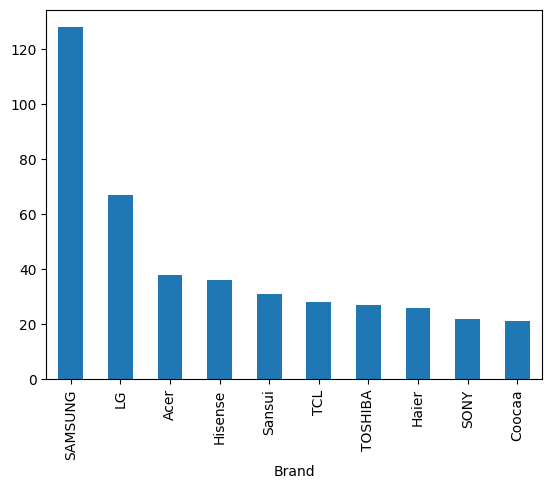

In [657]:
df["Brand"].value_counts().nlargest(10).plot(kind="bar")

<Axes: ylabel='count'>

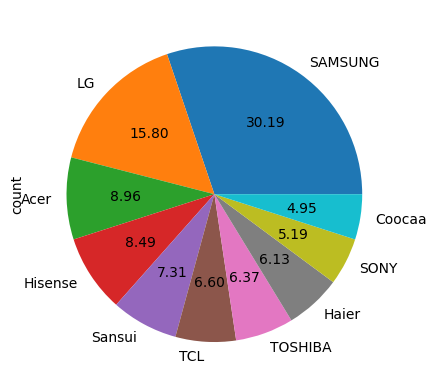

In [658]:
df["Brand"].value_counts().nlargest(10).plot(kind="pie",autopct="%.2f")

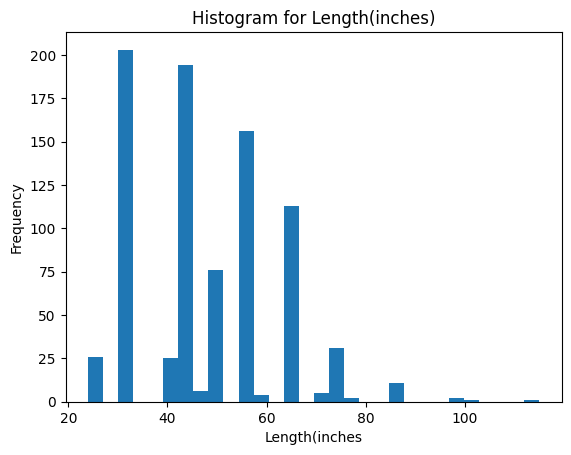

In [659]:
plt.hist(df['Length(inches)'],bins = 30)
plt.xlabel('Length(inches')
plt.ylabel('Frequency')
plt.title('Histogram for Length(inches)')
plt.show()

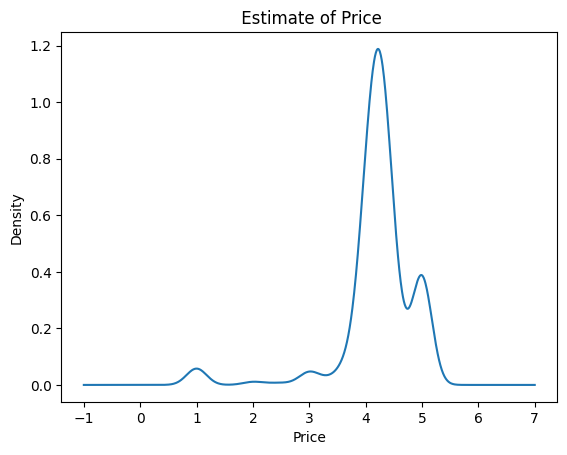

In [660]:
df["Ratings"].plot(kind="kde")

# Add title and axis labels
plt.title(' Estimate of Price')  # Title for the plot
plt.xlabel('Price')  # Label for the x-axis
plt.ylabel('Density')  # Label for the y-axis

# Show the plot
plt.show()

<Axes: >

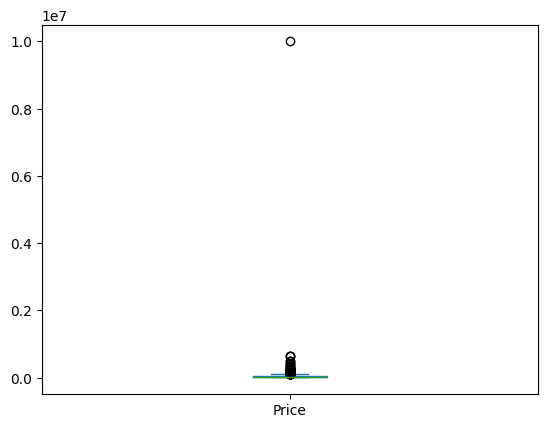

In [661]:
df["Price"].plot(kind="box")

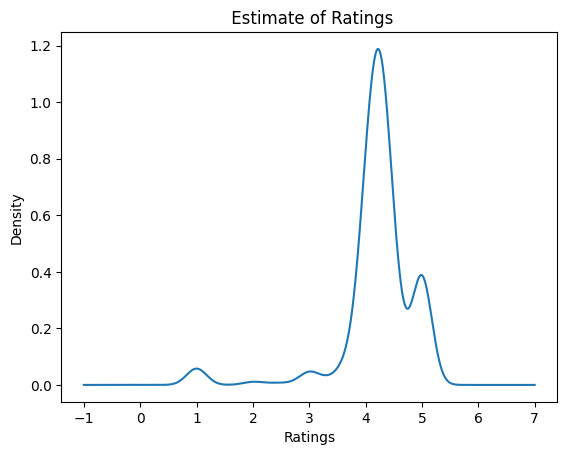

In [662]:
df["Ratings"].plot(kind="kde")

# Add title and axis labels
plt.title(' Estimate of Ratings')  # Title for the plot
plt.xlabel('Ratings')  # Label for the x-axis
plt.ylabel('Density')  # Label for the y-axis

# Show the plot
plt.show()

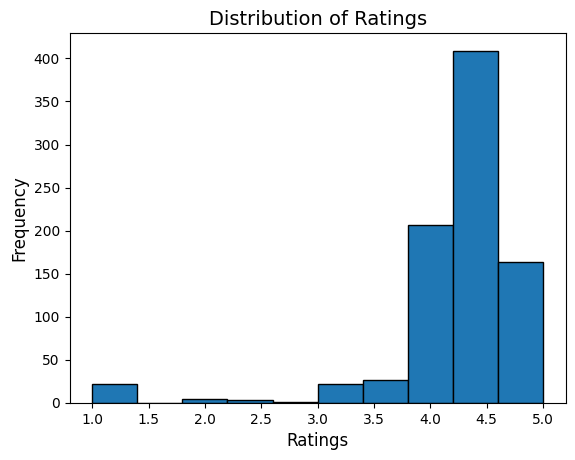

In [663]:
df["Ratings"].plot(kind="hist",edgecolor="Black")

# Add title and axis labels
plt.title("Distribution of Ratings", fontsize=14)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.show()

<Axes: xlabel='Operating System'>

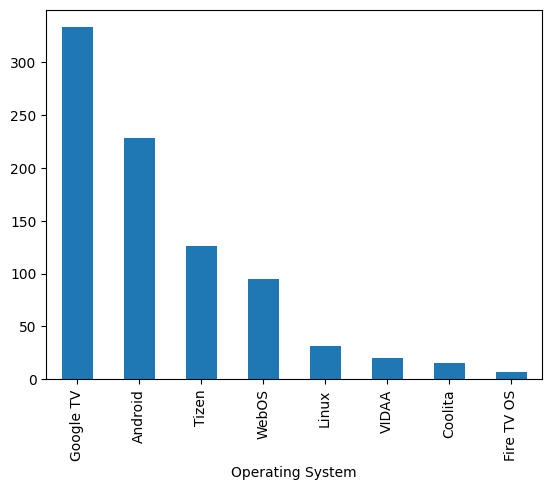

In [664]:
df[df["Operating System"] != "Not Specified"]["Operating System"].value_counts().nlargest(10).plot(kind="bar")


<Axes: ylabel='count'>

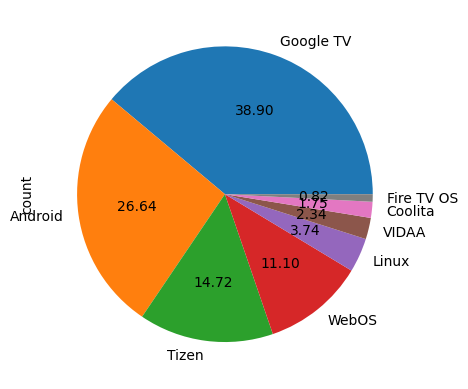

In [665]:
df[df["Operating System"] != "Not Specified"]["Operating System"].value_counts().nlargest(10).plot(kind="pie", autopct="%.2f")


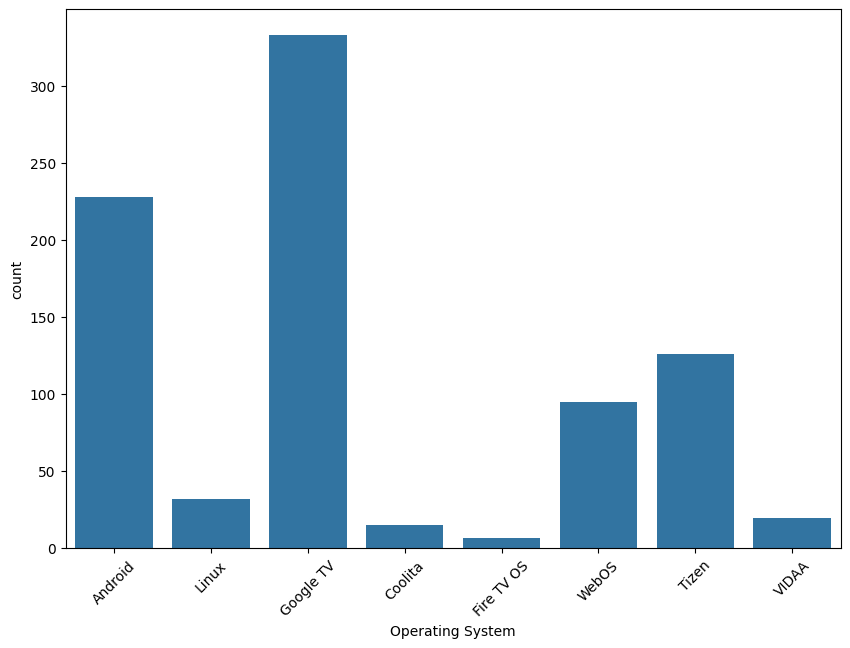

In [666]:
plt.figure(figsize=(10,7))
sns.countplot(data=df[df["Operating System"] != "Not Specified"], x='Operating System')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<Axes: xlabel='Display', ylabel='count'>

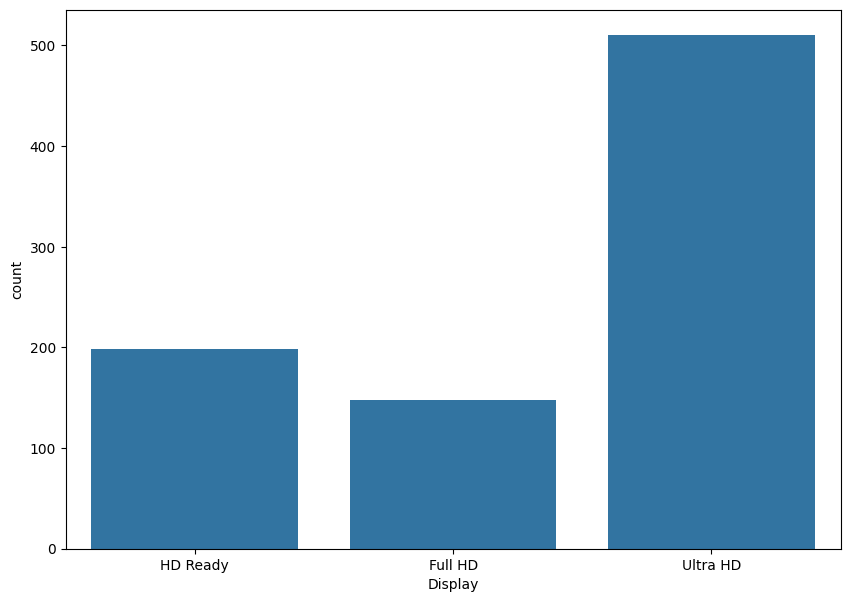

In [667]:
plt.figure(figsize = (10,7))
sns.countplot(data = df,x = 'Display')

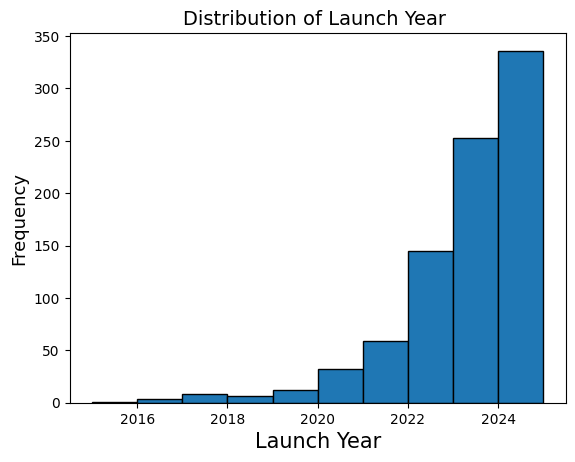

In [668]:
df["Launch Year"].plot(kind="hist",edgecolor="Black")

# Add title and axis labels
plt.title("Distribution of Launch Year ", fontsize=14)
plt.xlabel("Launch Year", fontsize=15)
plt.ylabel("Frequency", fontsize=13)

# Show the plot
plt.show()

<Axes: ylabel='count'>

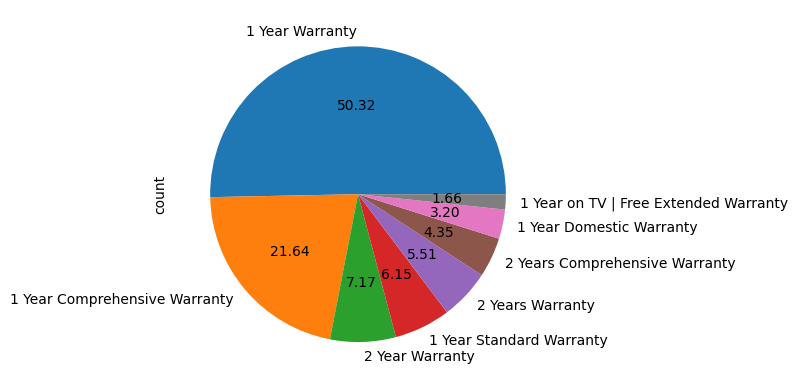

In [669]:
df["Warranty"].value_counts().nlargest(8).plot(kind="pie",autopct="%.2f")

# Bivariate analysis

([0, 1, 2],
 [Text(0, 0, 'HD Ready'), Text(1, 0, 'Full HD'), Text(2, 0, 'Ultra HD')])

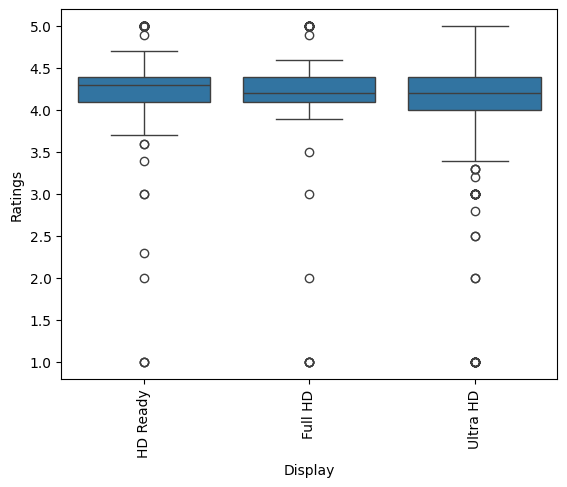

In [670]:
sns.boxplot(x="Display", y="Ratings", data=df)
plt.xticks(rotation=90)

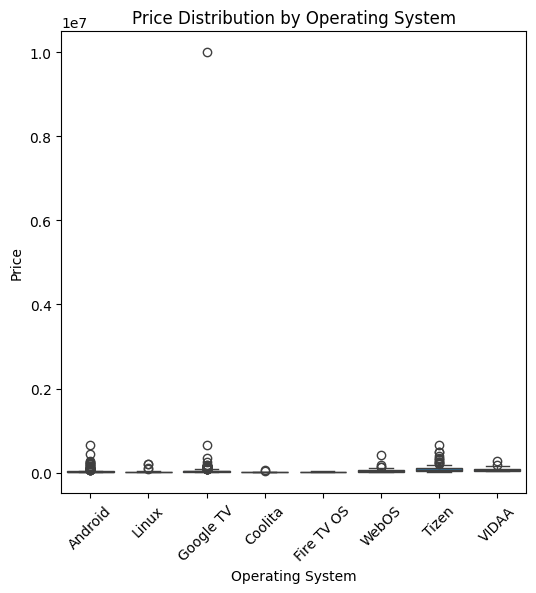

In [671]:
filtered_df = df[df["Operating System"] != "Not Specified"]
plt.figure(figsize=(6, 6))
sns.boxplot(x="Operating System", y="Price", data=filtered_df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Operating System")
plt.show()

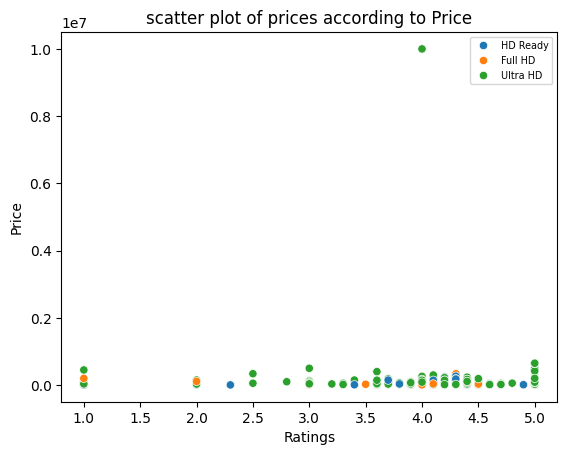

In [672]:
sns.scatterplot(x=df['Ratings'],y=df['Price'],hue=df['Display'])
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.title("scatter plot of prices according to Price")
plt.legend(fontsize='x-small')
plt.show()

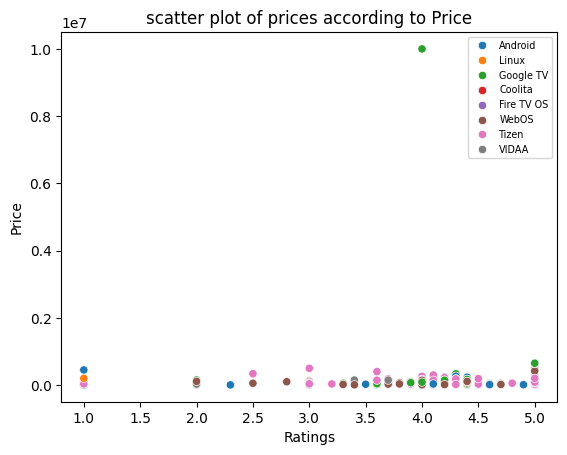

In [673]:
sns.scatterplot(x=df['Ratings'],y=df['Price'],hue=df['Operating System'])
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.title("scatter plot of prices according to Price")
plt.legend(fontsize='x-small')
plt.show()

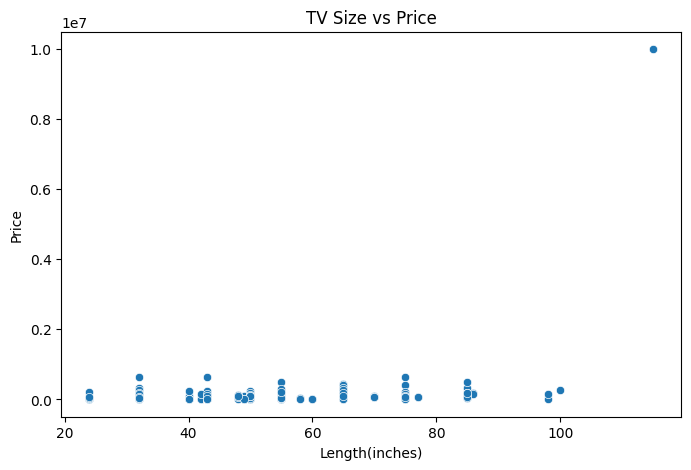

In [674]:
plt.figure(figsize=(8, 5))  
sns.scatterplot(x=df['Length(inches)'], y=df['Price'])  
plt.xlabel("Length(inches)")  
plt.ylabel("Price")  
plt.title("TV Size vs Price")  
plt.show()

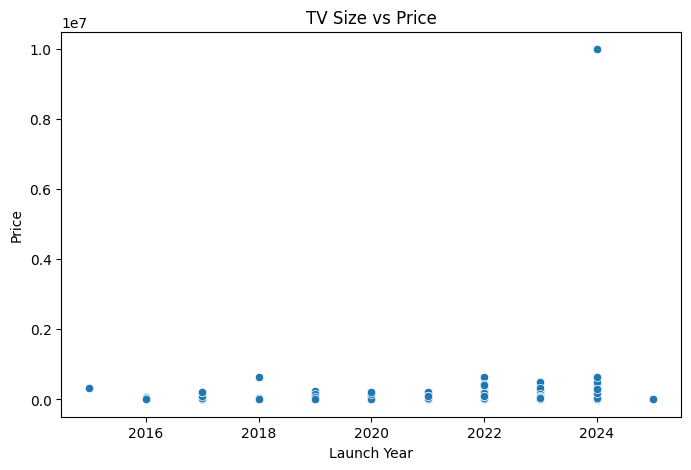

In [675]:
plt.figure(figsize=(8, 5))  
sns.scatterplot(x=df['Launch Year'], y=df['Price'])  
plt.xlabel("Launch Year")  
plt.ylabel("Price")  
plt.title("TV Size vs Price")  
plt.show()

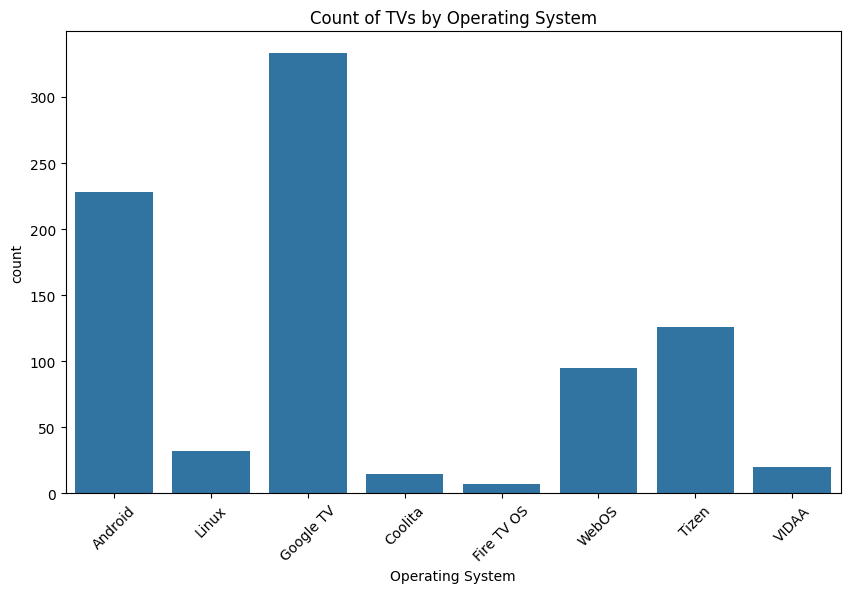

In [676]:
filtered_df = df[df["Operating System"] != "Not Specified"]
plt.figure(figsize=(10, 6))
sns.countplot(x="Operating System", data=filtered_df)
plt.xticks(rotation=45)
plt.title("Count of TVs by Operating System")
plt.show()

Text(0.5, 1.0, 'Price Distribution by Operating System and Display Type')

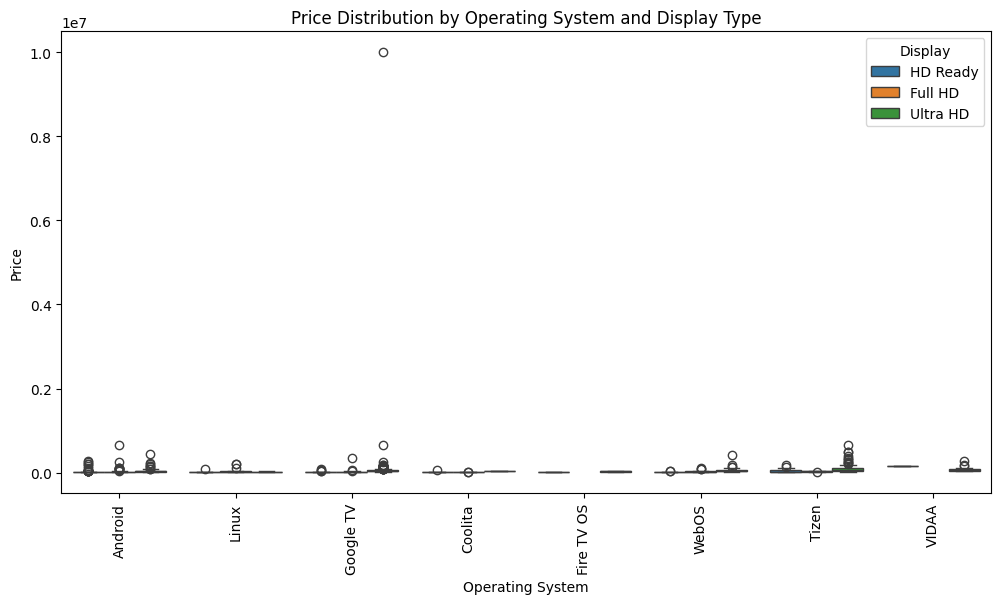

In [677]:
filtered_df = df[df["Operating System"] != "Not Specified"]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Operating System", y="Price", hue="Display", data=filtered_df)
plt.xticks(rotation=90)
plt.title("Price Distribution by Operating System and Display Type")


In [678]:
df.corr(numeric_only=True)

,Length(inches),Price,Ratings,Launch Year
Length(inches),1.000000,0.231855,-0.061374,0.061427
Price,0.231855,1.000000,-0.014055,0.010827
Ratings,-0.061374,-0.014055,1.000000,-0.015021
Launch Year,0.061427,0.010827,-0.015021,1.000000


# Multivariate

<Axes: >

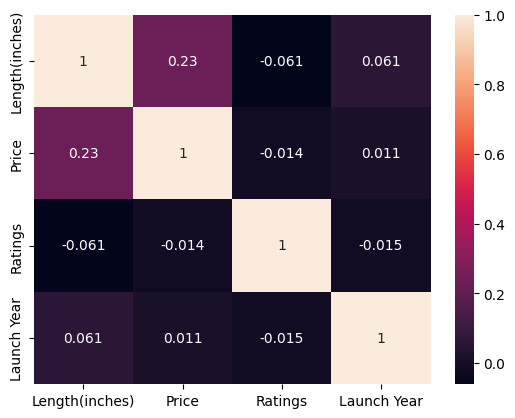

In [679]:
sns.heatmap(df.corr(numeric_only=True),annot = True)